In [1]:
from omigo_core import tsv
from omigo_ext import graphviz_ext

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.container { height:200% !important; }</style>"))

In [6]:
# create some list of vertices
vtsv = tsv.TSV("\t".join(["id", "name", "type"]), []) \
    .add_map_as_row({"id": "A1", "name": "Chris Evans", "type": "actor"}) \
    .add_map_as_row({"id": "A2", "name": "Robert Downy Jr.", "type": "actor"}) \
    .add_map_as_row({"id": "A3", "name": "Sabastian Stan", "type": "actor"}) \
    .add_map_as_row({"id": "A4", "name": "Scarlett Johansson", "type": "actor"}) \
    .add_map_as_row({"id": "A5", "name": "Tom Holland", "type": "actor"}) \
    .add_map_as_row({"id": "B1", "name": "Captain America", "type": "movie"}) \
    .add_map_as_row({"id": "B2", "name": "Civil War", "type": "movie"}) \
    .add_map_as_row({"id": "B3", "name": "Winter Soldier", "type": "movie"}) \
    .add_map_as_row({"id": "B4", "name": "Avengers", "type": "movie"}) \
    .add_map_as_row({"id": "B5", "name": "Black Widow", "type": "movie"}) \
    .add_map_as_row({"id": "B6", "name": "Spiderman", "type": "movie"}) \
    .add_map_as_row({"id": "B7", "name": "Infinity War", "type": "movie"}) \

    #.add_map_as_row({"id": "B8", "name": "Endgame", "type": "movie"})

# create some edges
etsv = tsv.TSV("\t".join(["x1", "x2", "type"]), []) \
    .add_map_as_row({"x1": "Chris Evans", "x2": "Captain America", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Chris Evans", "x2": "Civil War", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Chris Evans", "x2": "Avengers", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Chris Evans", "x2": "Infinity War", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Chris Evans", "x2": "Endgame", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Robert Downy Jr.", "x2": "Avengers", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Robert Downy Jr.", "x2": "Infinity War", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Robert Downy Jr.", "x2": "Spiderman", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Robert Downy Jr.", "x2": "Winter Soldier", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Robert Downy Jr.", "x2": "Endgame", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Scarlett Johansson", "x2": "Captain America", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Scarlett Johansson", "x2": "Black Widow", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Scarlett Johansson", "x2": "Avengers", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Scarlett Johansson", "x2": "Infinity War", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Scarlett Johansson", "x2": "Endgame", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Tom Holland", "x2": "Spiderman", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Tom Holland", "x2": "Avengers", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Tom Holland", "x2": "Civil War", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Tom Holland", "x2": "Infinity War", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Tom Holland", "x2": "Endgame", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Sabastian Stan", "x2": "Captain America", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Sabastian Stan", "x2": "Winter Soldier", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Sabastian Stan", "x2": "Civil War", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Sabastian Stan", "x2": "Infinity War", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Sabastian Stan", "x2": "Endgame", "type": "acts_in"}) \
    .add_map_as_row({"x1": "Captain America", "x2": "Winter Soldier", "type": "sequel"}) \
    .add_map_as_row({"x1": "Winter Soldier", "x2": "Civil War", "type": "sequel"}) \
    .add_map_as_row({"x1": "Avengers", "x2": "Infinity War", "type": "sequel"}) \
    .add_map_as_row({"x1": "Infinity War", "x2": "Endgame", "type": "sequel"}) \
    .add_map_as_row({"x1": "Chris Evans", "x2": "Sabastian Stan", "type": "friends"}) \
    .add_map_as_row({"x1": "Chris Evans", "x2": "Scarlett Johansson", "type": "friends"}) \
    .add_map_as_row({"x1": "Robert Downy Jr.", "x2": "Tom Holland", "type": "friends"}) \




[WARN]: There are edge ids that dont have vertex information: {'Endgame'}


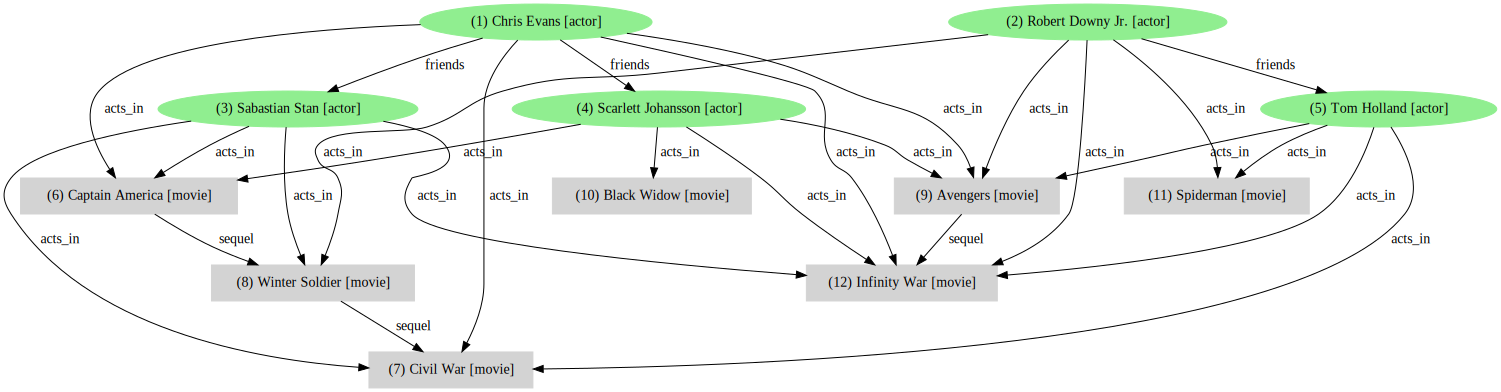

In [17]:
# define custom function to control the style
def custom_display_func(mp):
    props = graphviz_ext.__default_dot_style_func__(mp)
    if (mp["type"] == "actor"):
        props["shape"] = "oval"
        props["color"] = "lightgreen"
    else:
        props["shape"] = "rectangle"
        props["color"] = "lightgrey"        
    return props    

vtsv2 = vtsv \
    .add_seq_num("index") \
    .transform(["index", "name", "type"], lambda x,y,z: "({}) {} [{}]".format(x, y, z), "display_name")

graphviz_ext.plot_graph(vtsv2, etsv, "name", "x1", "x2", vertex_display_id="display_name", style_func=custom_display_func, edge_props = ["type"])

In [12]:
vtsv2.show()

index	id	name              	type 	display_name          
1    	A1	Chris Evans       	actor	(1) Chris Evans       
2    	A2	Robert Downy Jr.  	actor	(2) Robert Downy Jr.  
3    	A3	Sabastian Stan    	actor	(3) Sabastian Stan    
4    	A4	Scarlett Johansson	actor	(4) Scarlett Johansson
5    	A5	Tom Holland       	actor	(5) Tom Holland       
6    	B1	Captain America   	movie	(6) Captain America   
7    	B2	Civil War         	movie	(7) Civil War         
8    	B3	Winter Soldier    	movie	(8) Winter Soldier    
9    	B4	Avengers          	movie	(9) Avengers          
10   	B5	Black Widow       	movie	(10) Black Widow      
11   	B6	Spiderman         	movie	(11) Spiderman        
12   	B7	Infinity War      	movie	(12) Infinity War     
